# Find relation between Satisfaction level and performance rating

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [4]:
# Load the data
data = pd.read_csv ('HR_data.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Check what's inside
data = data[['satisfaction_level', 'last_evaluation']]
data.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


## Plot the data

Create a preliminary plot to see if you can spot something

Text(0, 0.5, 'Evaluation')

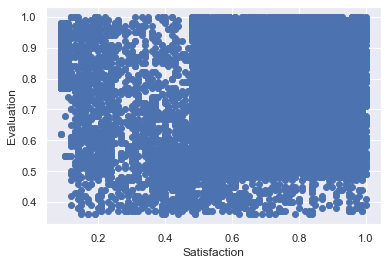

In [6]:
# We are creating a scatter plot of the two variables
plt.scatter(data['satisfaction_level'],data['last_evaluation'])
# Name your axes 
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')

## Select the features

In [7]:
# Select both features by creating a copy of the data variable
x = data.copy()

## Take advantage of the Elbow method

In [8]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[1366.558744049595,
 686.544594922997,
 472.14522089308105,
 313.26208302784914,
 226.55150373294398,
 183.3766622385041,
 163.56023265721709,
 144.48940840494274,
 127.60481710486646]

Text(0, 0.5, 'WCSS')

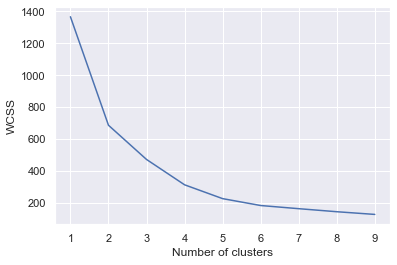

In [9]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [15]:
# Fiddle with K (the number of clusters)
# As per above graph we can take clusters as 5 or 6
kmeans_new = KMeans(6)
# Fit the data
kmeans_new.fit(x)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)

In [16]:
# Check if everything seems right
clusters_new

,satisfaction_level,last_evaluation,cluster_pred
0,0.38,0.53,5
1,0.80,0.86,1
2,0.11,0.88,2
3,0.72,0.87,1
4,0.37,0.52,5
...,...,...,...
14994,0.40,0.57,5
14995,0.37,0.48,5
14996,0.37,0.53,5
14997,0.11,0.96,2


Text(0, 0.5, 'Evaluation')

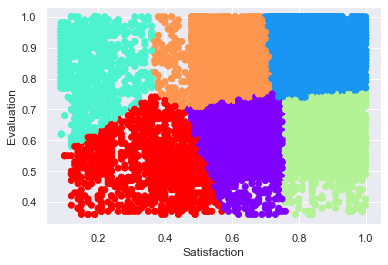

In [17]:
# Plot
plt.scatter(clusters_new['satisfaction_level'],clusters_new['last_evaluation'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')